In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import missingno
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

warnings.simplefilter("ignore")
sns.set_style("whitegrid")

In [8]:
import pandas as pd

try:
    df = pd.read_csv("C:\\Users\\tanis\\Downloads\\IMDb Movies India.csv.zip", encoding='latin1')
    print(df.head())
except UnicodeDecodeError as e:
    print(f"Error reading the file: {e}")


                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [9]:
df.shape

(15509, 10)

<Axes: >

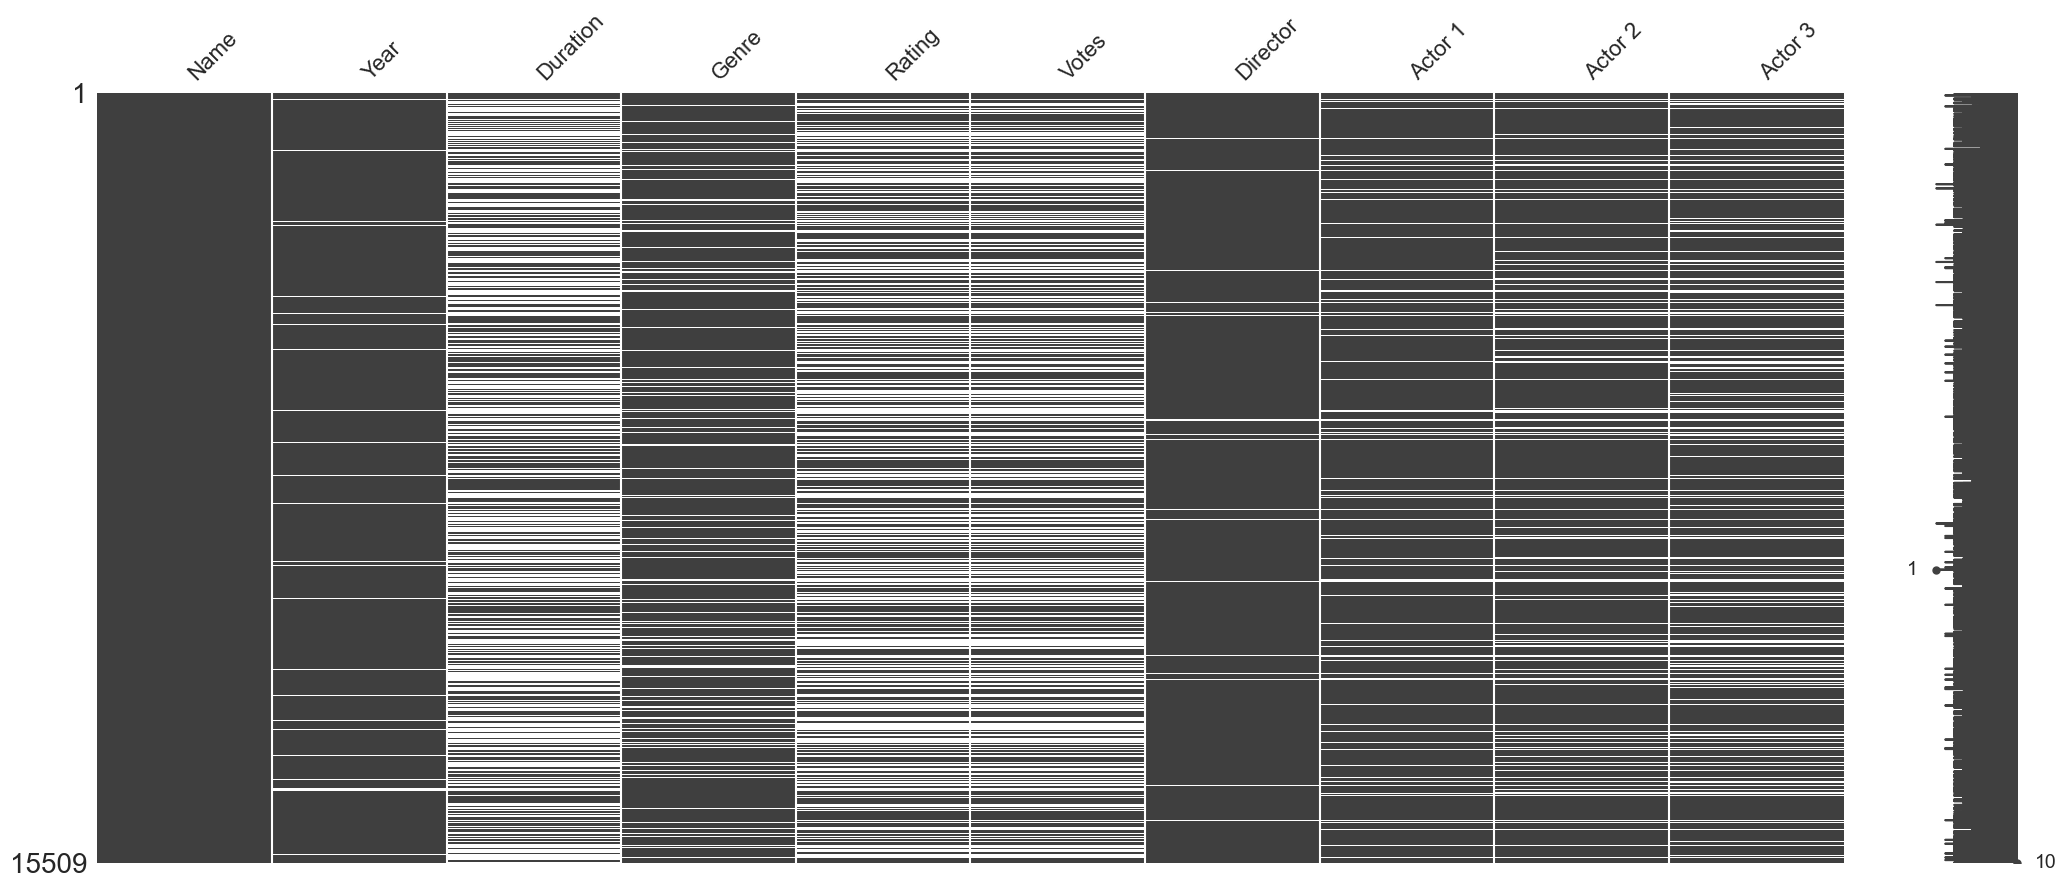

In [10]:
missingno.matrix(df)

In [11]:
year = []
for y in df.Year:
    if type(y) == float:
        year.append(np.nan)
    else:
        year.append(int(str(y)[1:5]))
df["Year"] = year
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019.0,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [12]:
duration = []
for d in df.Duration:
    if type(d) == float:
        duration.append(np.nan)
    else:
        duration.append(int(str(d).split(" ")[0]))
df["Duration"] = duration
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90.0,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105.0,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   float64
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7919 non-null   float64
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(4), object(6)
memory usage: 1.2+ MB


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,14981.0,1987.012215,25.416689,1913.0,1968.0,1991.0,2009.0,2022.0
Duration,7240.0,128.126519,28.912724,2.0,110.0,131.0,147.0,321.0
Rating,7919.0,5.841621,1.381777,1.1,4.9,6.0,6.8,10.0
Votes,7919.0,1938.520394,11602.415952,5.0,16.0,55.0,404.0,591417.0


In [18]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7590
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [19]:
def TopTenPlot(column):
    global df
    df[column].value_counts().sort_values(ascending=False)[:10].plot(kind="bar", figsize=(20,6), edgecolor="k")
    plt.xticks(rotation=0)
    plt.title("Top Ten {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

In [20]:
def Histogram(column):
    global df
    plt.figure(figsize=(20,6))
    plt.hist(df[column], edgecolor="k")
    plt.xticks(rotation=0)
    plt.title("Histogram of {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

In [21]:
def Scatter(x, y, c=None):
    global df
    plt.figure(figsize=(20,6))
    plt.scatter(df[x], df[y], edgecolor="k", c=c)
    plt.xticks(rotation=0)
    plt.title("Scatter plot X:{} / Y:{}".format(x, y))
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show() 

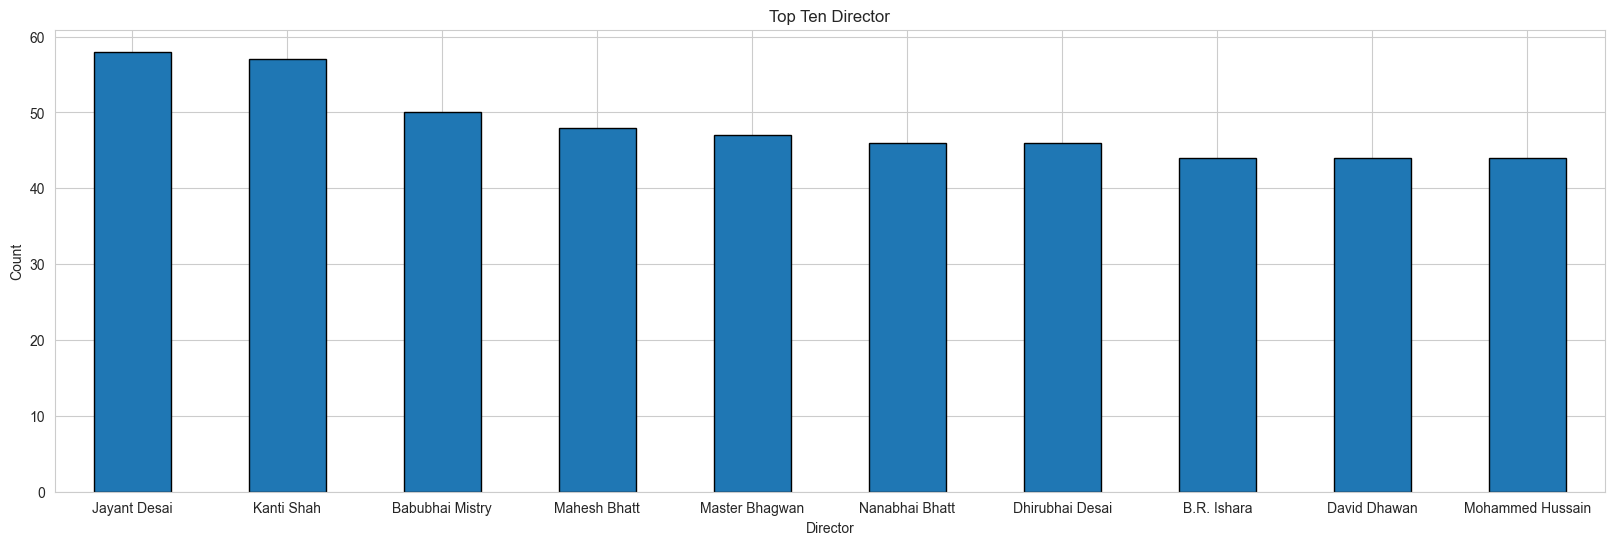

In [22]:
TopTenPlot("Director")

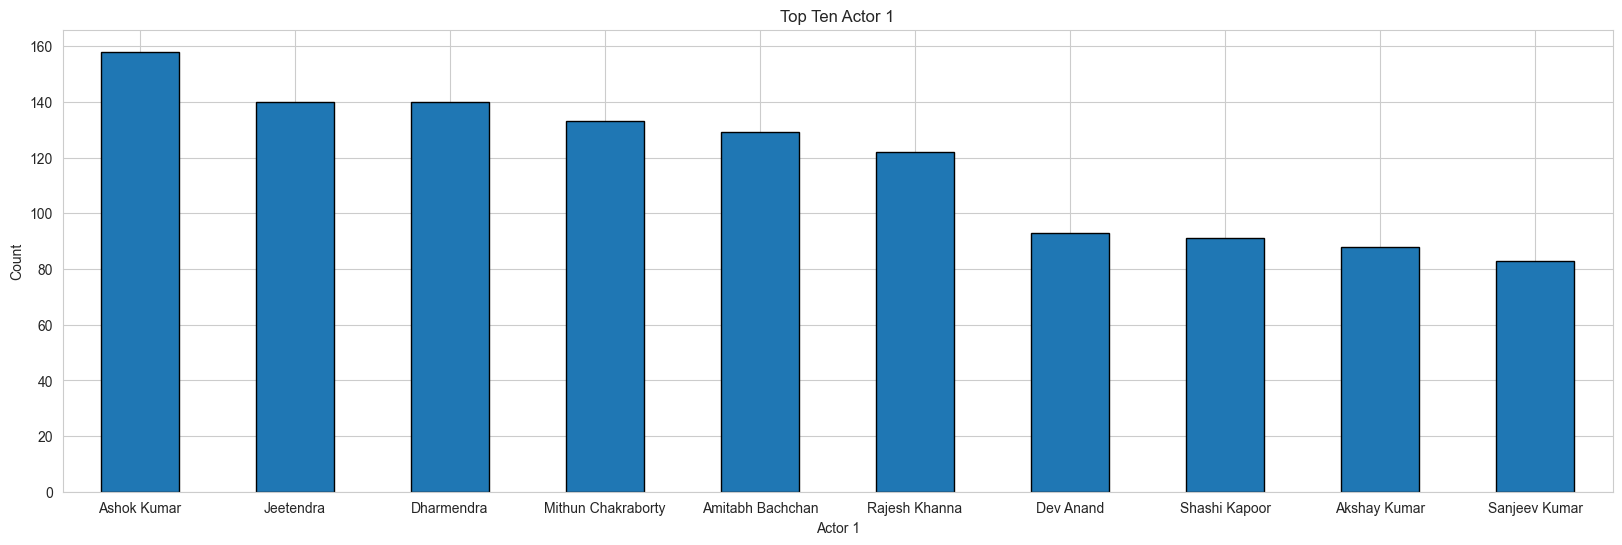

In [23]:
TopTenPlot("Actor 1")

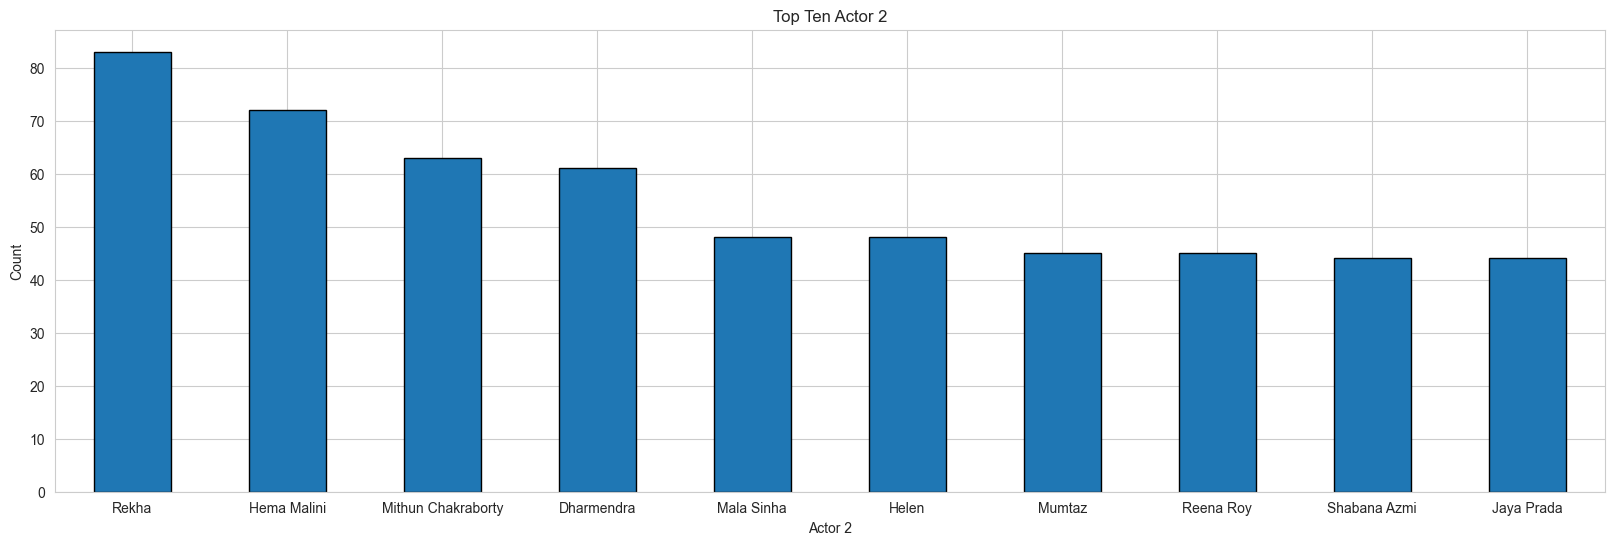

In [24]:
TopTenPlot("Actor 2")

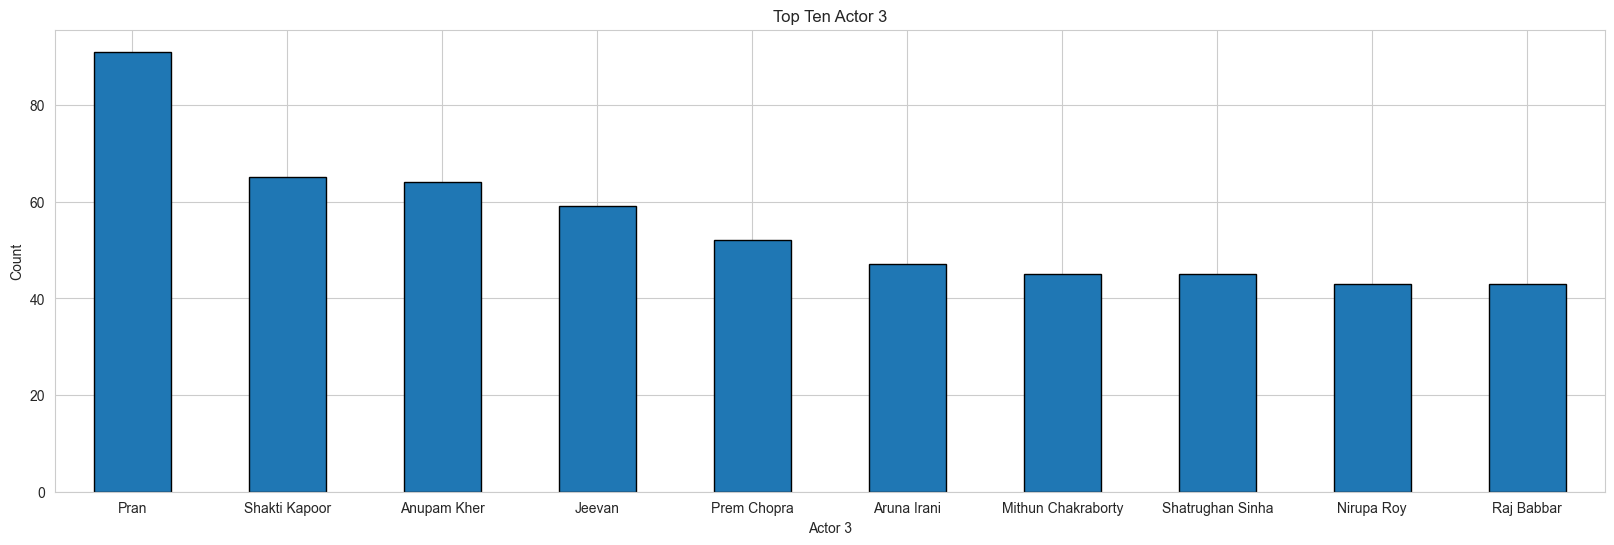

In [25]:
TopTenPlot("Actor 3")

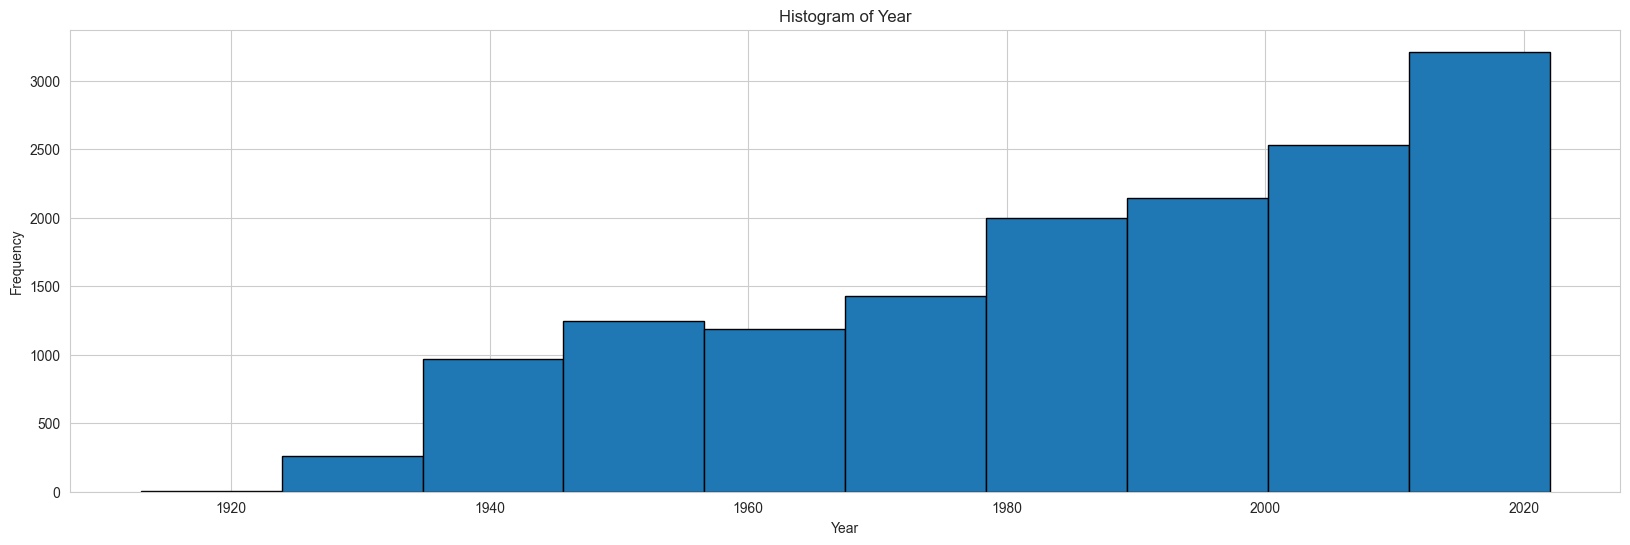

In [26]:
Histogram("Year")

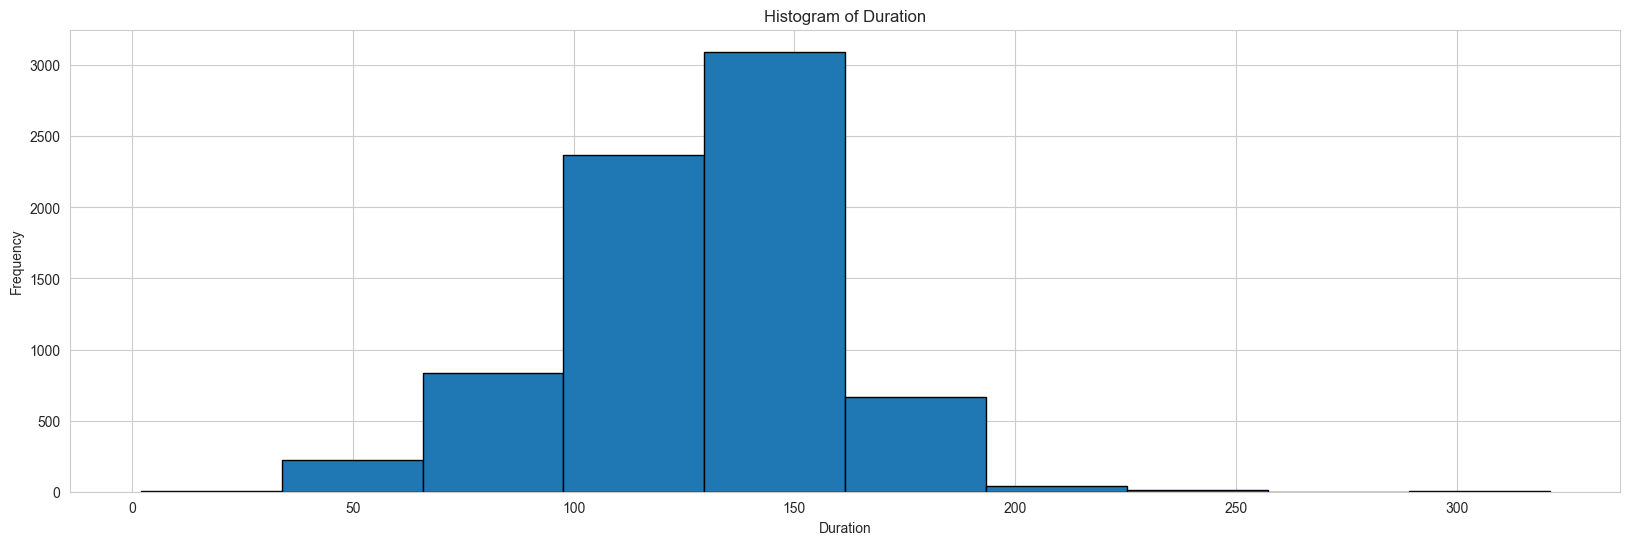

In [27]:
Histogram("Duration")

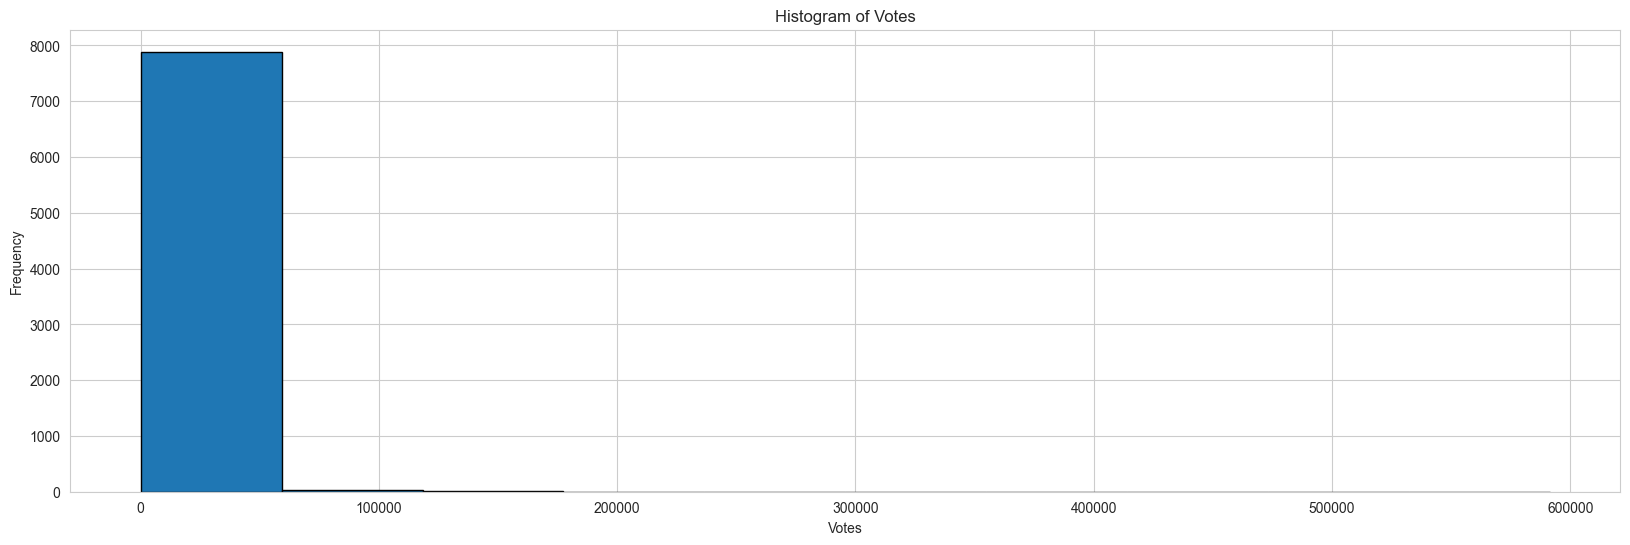

In [28]:
Histogram("Votes")

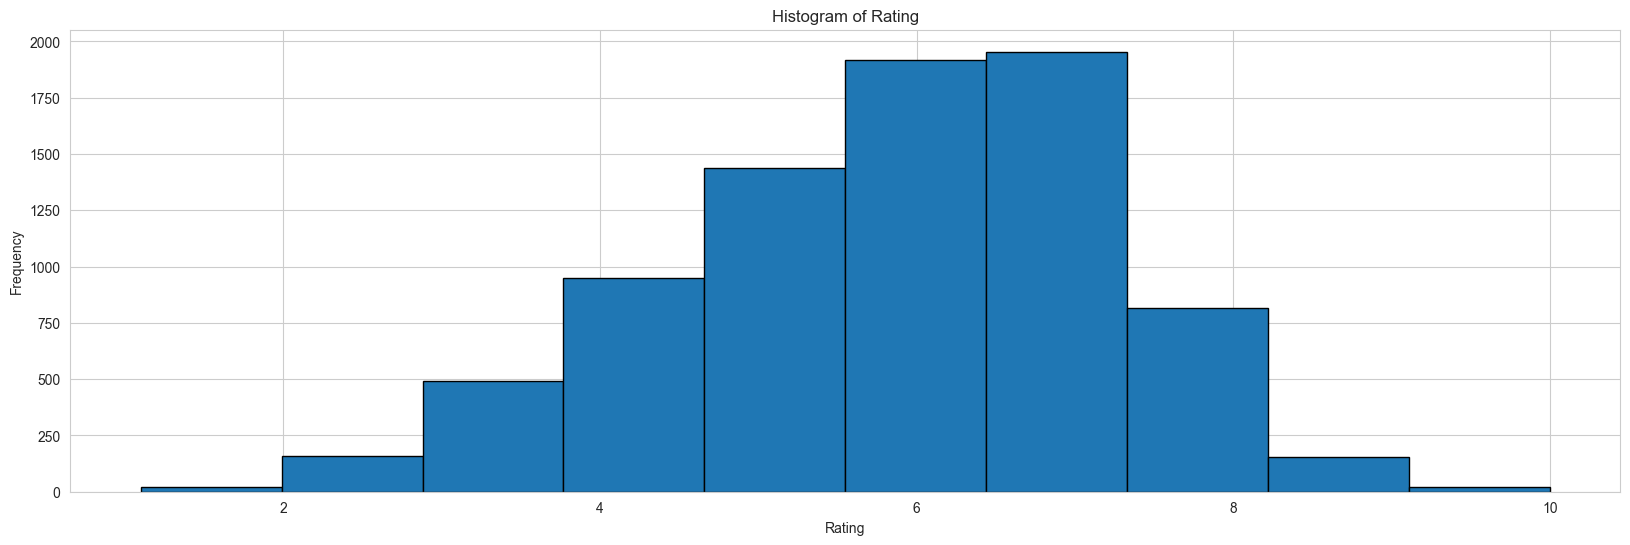

In [29]:
Histogram("Rating")

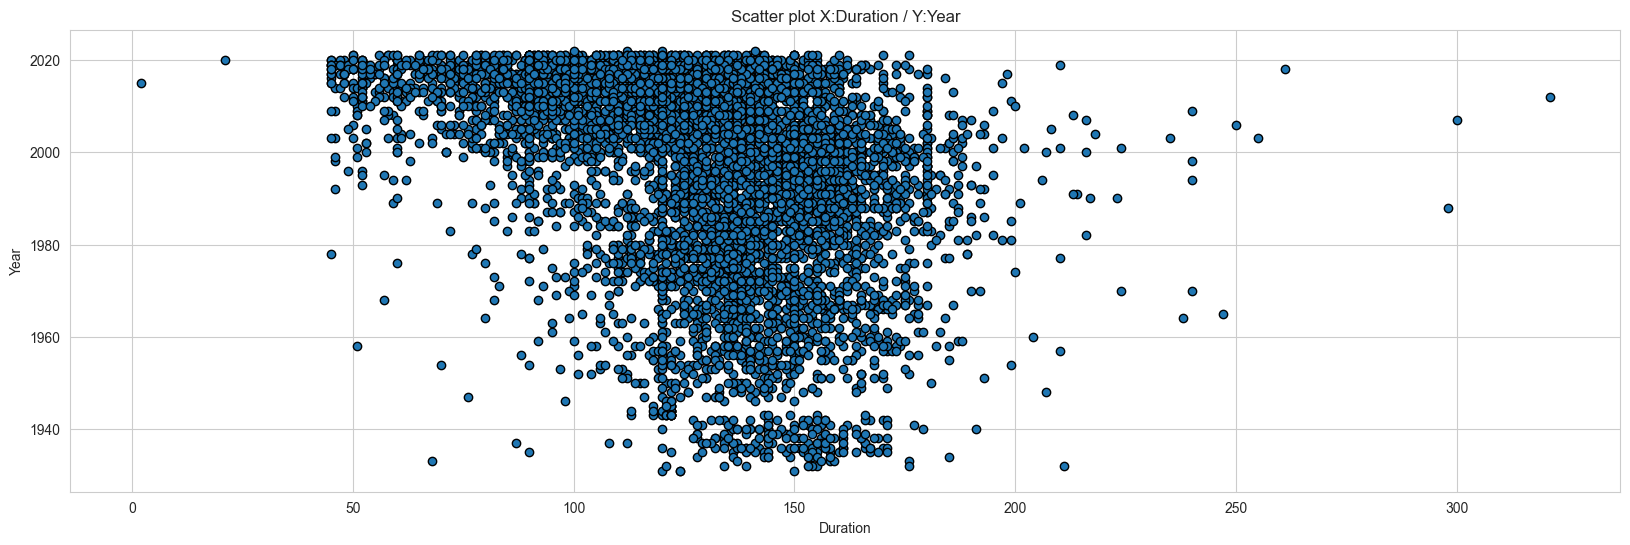

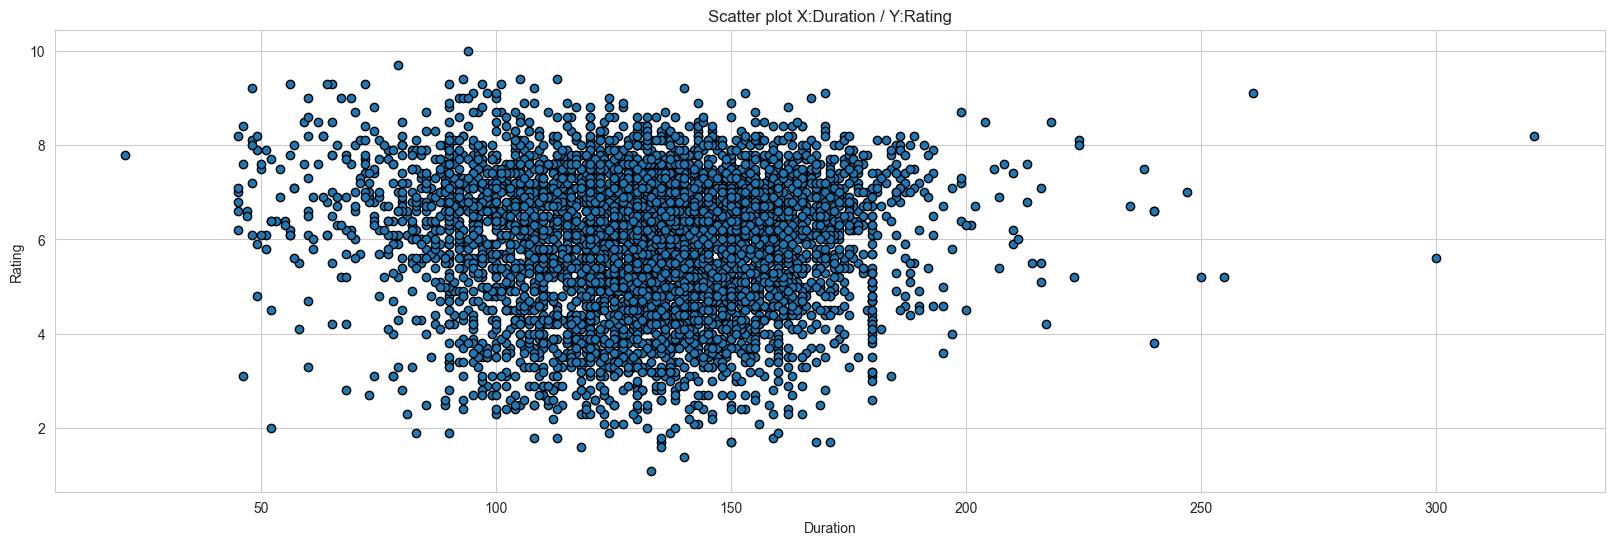

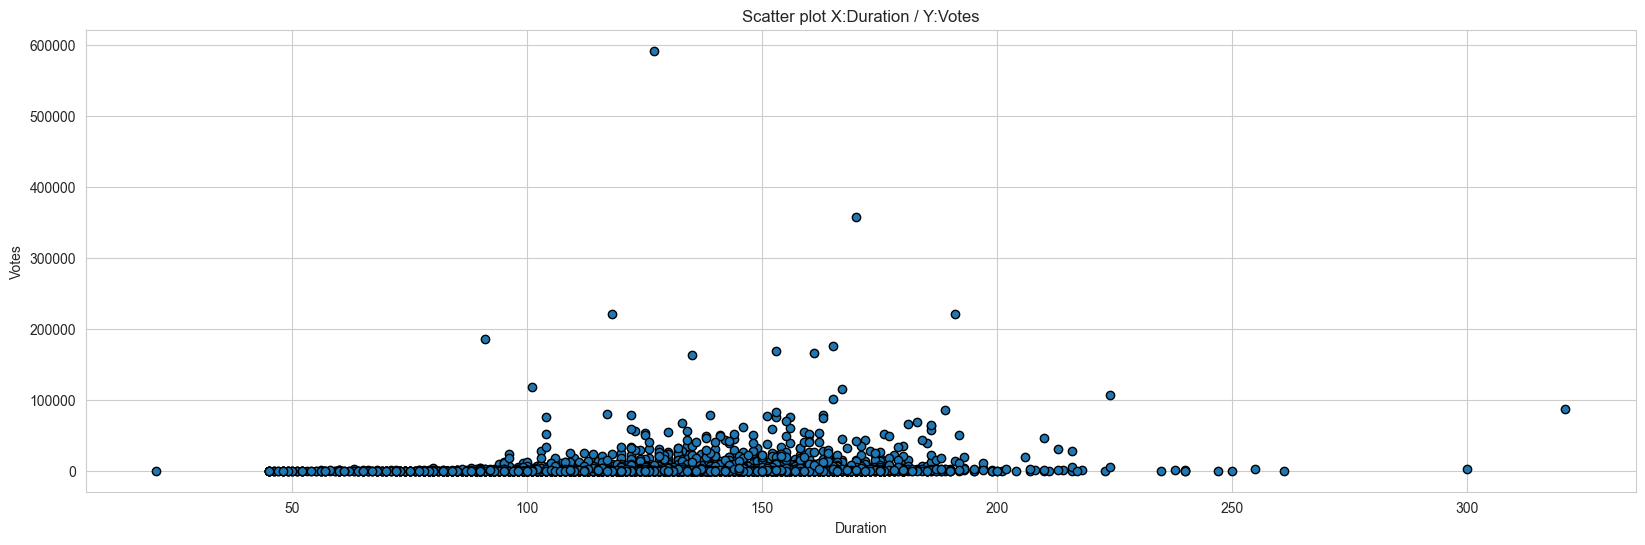

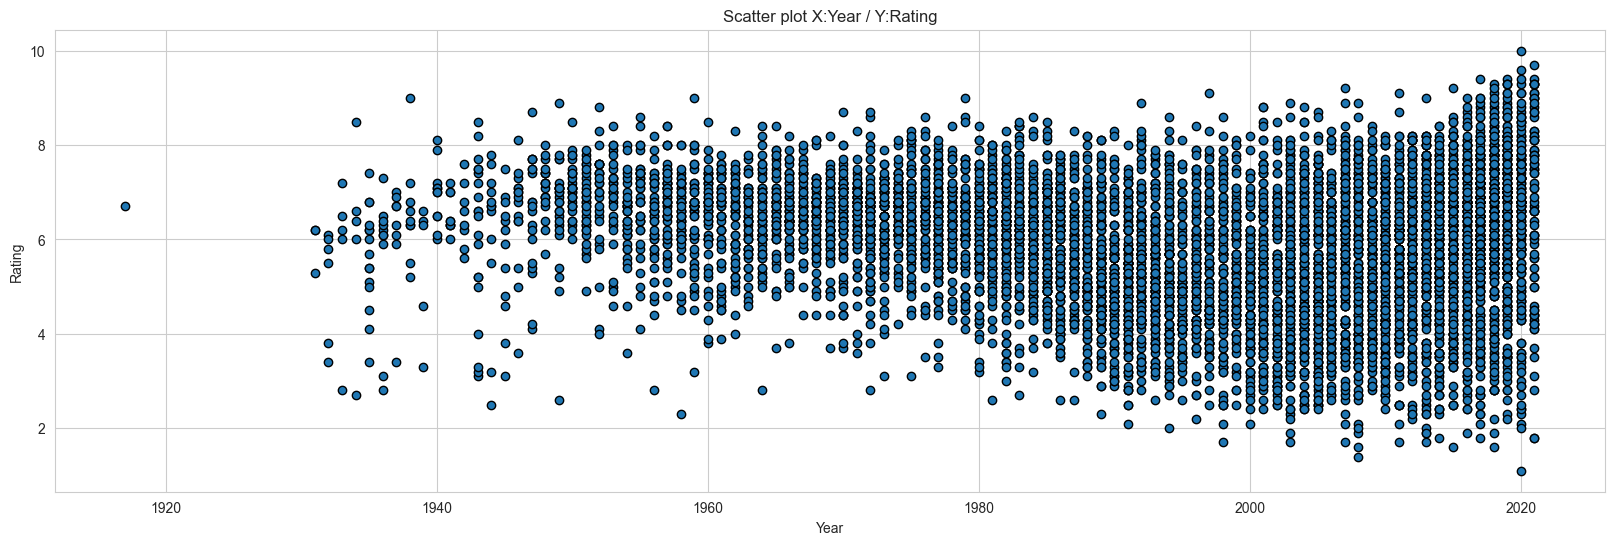

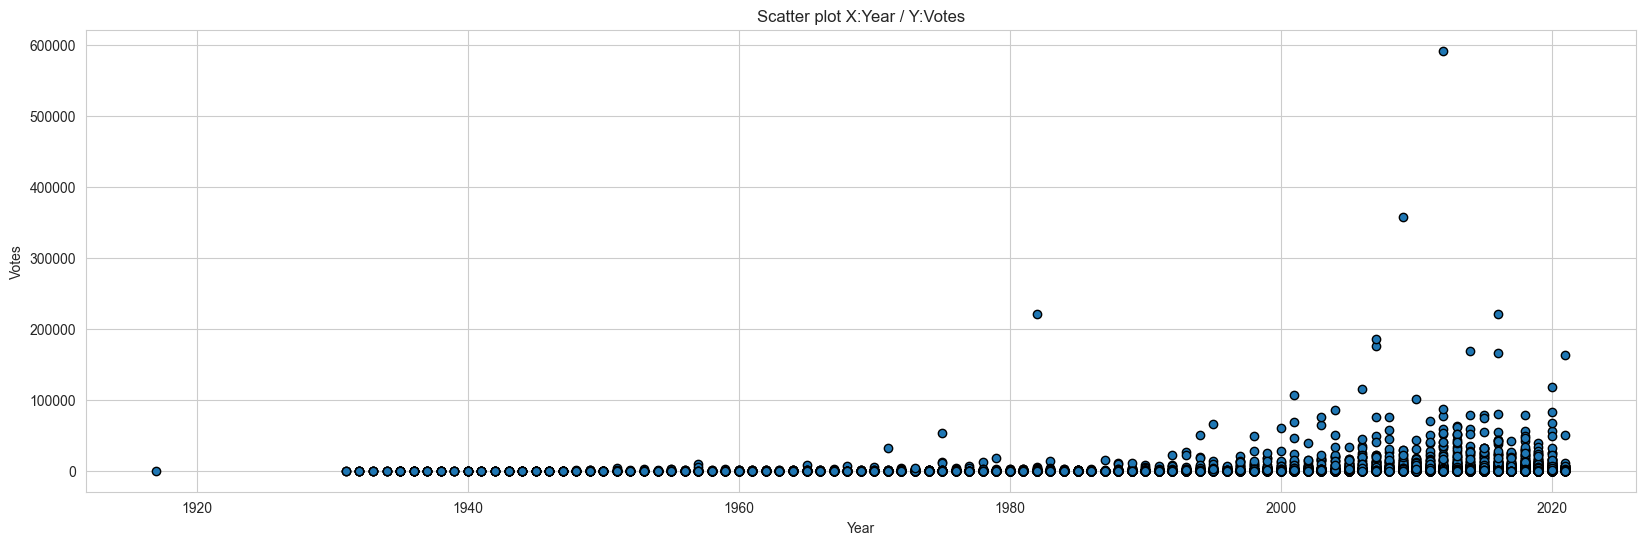

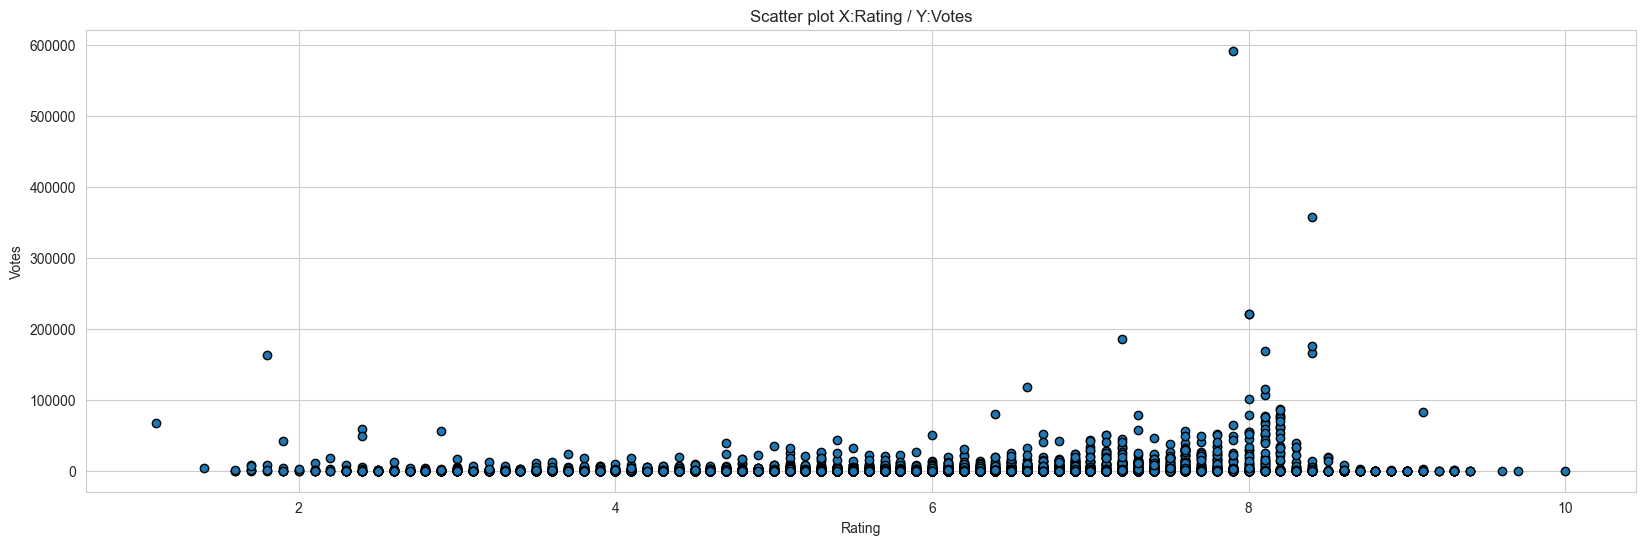

In [30]:
from itertools import combinations
 
comb = combinations(["Duration", "Year", "Rating", "Votes"], 2)
comb_list = []
for i in list(comb):
    comb_list.append(list(i))
    
for col in comb_list:
    Scatter(col[0], col[1])

In [32]:
worst = df.sort_values("Votes", ascending=False).dropna().tail(10)[[ "Name", "Year", "Duration", "Votes", "Director","Actor 1"]].reset_index(drop=True)
top = df.sort_values("Votes", ascending=False).head(10)[[ "Name", "Year", "Duration", "Votes", "Director","Actor 1"]].reset_index(drop=True)

In [33]:
worst

,Name,Year,Duration,Votes,Director,Actor 1
0,Naami Chor,1977.0,127.0,5.0,Manmohan Desai,Kamal Mehra
1,Kadke Kamal Ke,2019.0,136.0,5.0,Laxman Singh,Aaryan Adhikari
2,Jawab Ayega,1968.0,82.0,5.0,Ismat Chughtai,Shaheed Latif
3,Jai Mahakali,1951.0,162.0,5.0,Dhirubhai Desai,Nirupa Roy
4,Shankar Khan,1966.0,140.0,5.0,Nanabhai Bhatt,Prithviraj Kapoor
5,Jaan Lada Denge,1990.0,137.0,5.0,Dilip Gulati,Hemant Birje
6,Mounto,1975.0,114.0,5.0,Jambulingam,Navin Nischol
7,Bhai-Bahen,1959.0,136.0,5.0,G.P. Sippy,Daisy Irani
8,Shehnai,1947.0,133.0,5.0,P.L. Santoshi,Rehana
9,Intezar,1973.0,116.0,5.0,Mohan Singh Kavia,Rinku Jaiswal


In [34]:
top

,Name,Year,Duration,Votes,Director,Actor 1
0,Life of Pi,2012.0,127.0,591417.0,Ang Lee,Suraj Sharma
1,3 Idiots,2009.0,170.0,357889.0,Rajkumar Hirani,Aamir Khan
2,Lion,2016.0,118.0,220526.0,Garth Davis,Dev Patel
3,Gandhi,1982.0,191.0,220118.0,Richard Attenborough,Ben Kingsley
4,The Darjeeling Limited,2007.0,91.0,185127.0,Wes Anderson,Owen Wilson
5,Like Stars on Earth,2007.0,165.0,175810.0,Aamir Khan,Amole Gupte
6,PK,2014.0,153.0,168150.0,Rajkumar Hirani,Aamir Khan
7,Dangal,2016.0,161.0,165074.0,Nitesh Tiwari,Aamir Khan
8,Radhe,2021.0,135.0,162455.0,Prabhu Deva,Salman Khan
9,Dil Bechara,2020.0,101.0,117377.0,Mukesh Chhabra,Sushant Singh Rajput


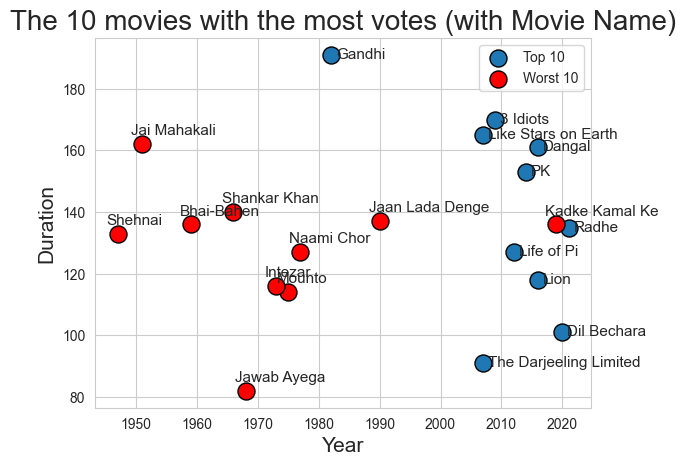

In [35]:
plt.scatter(top["Year"], top["Duration"], edgecolor="k",s=150, label="Top 10")
for i in range(10):
    plt.text(x=top["Year"][i]+0.8,y=top["Duration"][i]-1.2,s=top["Name"][i], fontsize=11, rotation =0)
plt.scatter(worst["Year"], worst["Duration"], color="red",s=150, label="Worst 10", edgecolor="k")
for i in range(10):
    plt.text(x=worst["Year"][i]-1.8,y=worst["Duration"][i]+3,s=worst["Name"][i], fontsize=11, rotation =0)
plt.legend()
plt.title("The 10 movies with the most votes (with Movie Name)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Duration", fontsize=15)
plt.xticks(rotation=0)
plt.show()

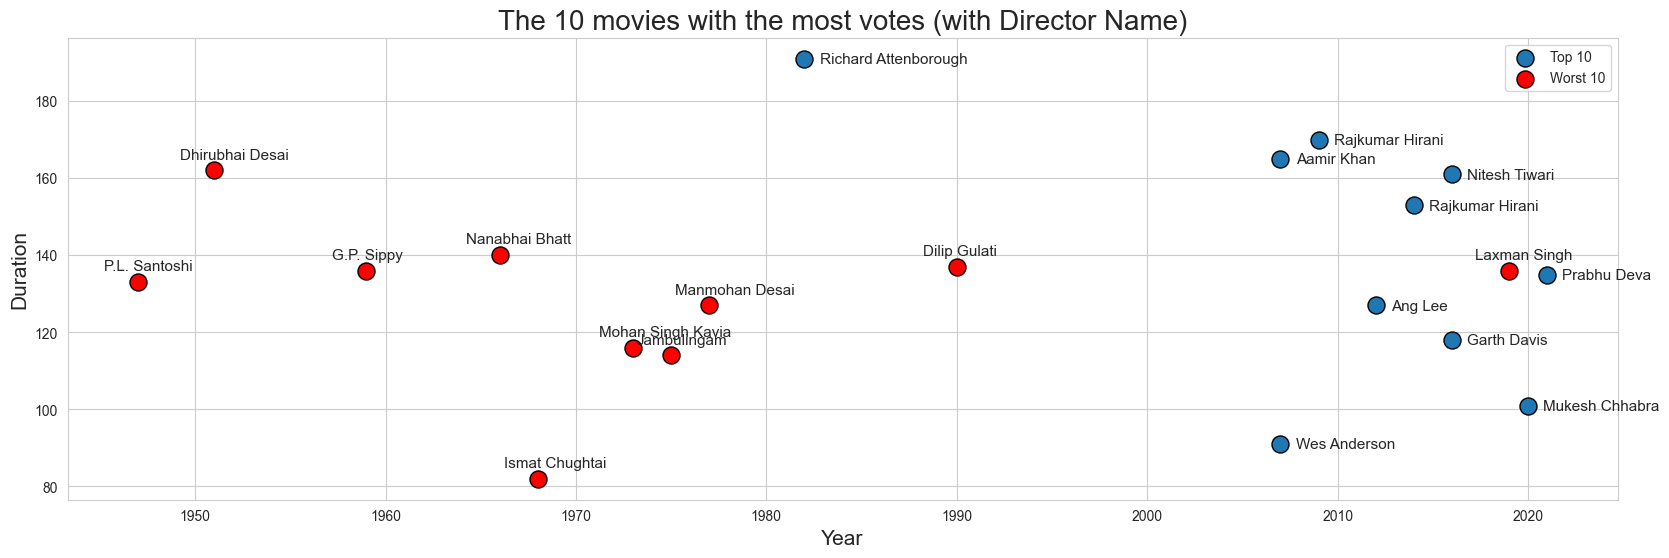

In [37]:
plt.figure(figsize=(20,6),dpi=100)
plt.scatter(top["Year"], top["Duration"], edgecolor="k",s=150, label="Top 10")
for i in range(10):
    plt.text(x=top["Year"][i]+0.8,y=top["Duration"][i]-1.2,s=top["Director"][i], fontsize=11, rotation =0)
plt.scatter(worst["Year"], worst["Duration"], color="red",s=150, label="Worst 10", edgecolor="k")
for i in range(10):
    plt.text(x=worst["Year"][i]-1.8,y=worst["Duration"][i]+3,s=worst["Director"][i], fontsize=11, rotation =0)
plt.legend()
plt.title("The 10 movies with the most votes (with Director Name)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Duration", fontsize=15)
plt.xticks(rotation=0)
plt.show()

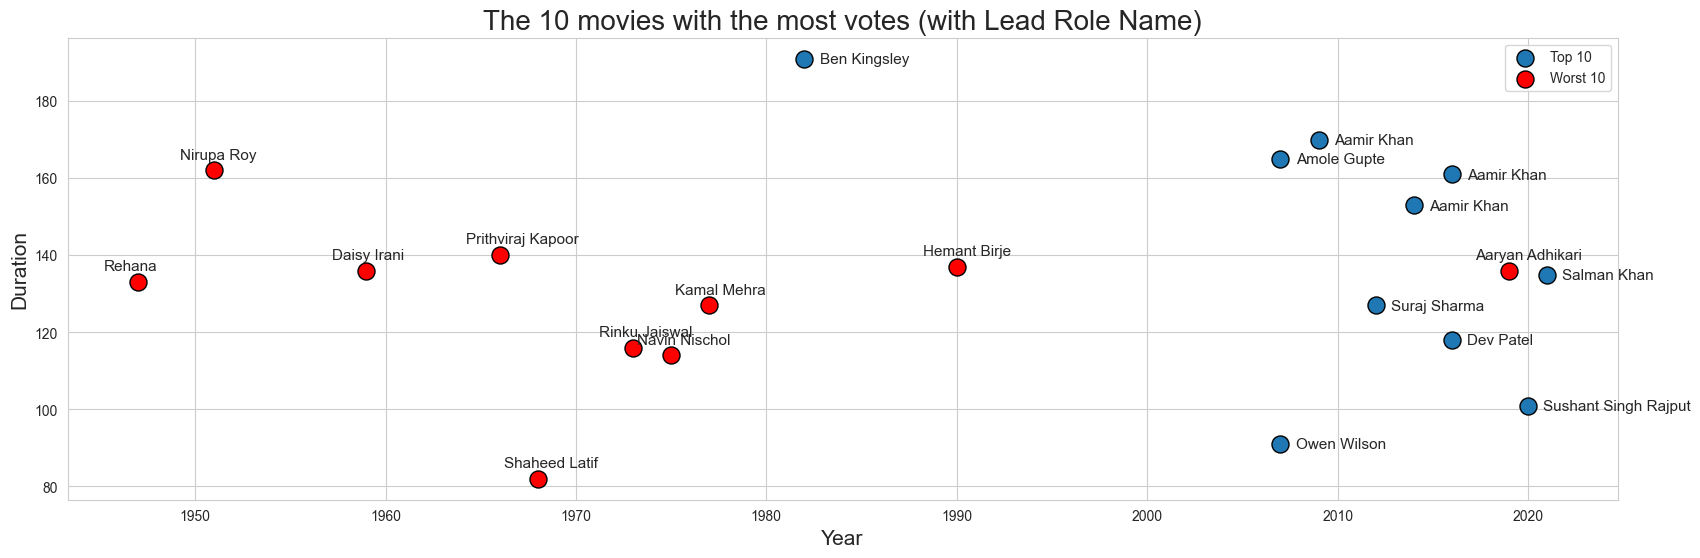

In [38]:
plt.figure(figsize=(20,6),dpi=100)
plt.scatter(top["Year"], top["Duration"], edgecolor="k",s=150, label="Top 10")
for i in range(10):
    plt.text(x=top["Year"][i]+0.8,y=top["Duration"][i]-1.2,s=top["Actor 1"][i], fontsize=11, rotation =0)
plt.scatter(worst["Year"], worst["Duration"], color="red",s=150, label="Worst 10", edgecolor="k")
for i in range(10):
    plt.text(x=worst["Year"][i]-1.8,y=worst["Duration"][i]+3,s=worst["Actor 1"][i], fontsize=11, rotation =0)
plt.legend()
plt.title("The 10 movies with the most votes (with Lead Role Name)", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Duration", fontsize=15)
plt.xticks(rotation=0)
plt.show()

In [ ]:
import pandas as pd

# Assuming df is your DataFrame and you have already loaded it

# Select and drop rows with NaN values in the specified columns
dur_rat = df[['Duration', 'Rating', 'Votes']].dropna()

# Ensure all values in 'Duration' are strings, replace ' min' and convert to int
dur_rat['Duration'] = dur_rat['Duration'].astype(str).str.replace(' min', '').astype(int)

# Ensure all values in 'Votes' are strings, replace commas and convert to float
dur_rat['Votes'] = dur_rat['Votes'].astype(str).str.replace(',', '').astype(float)

# Display the first few rows to verify the result
print(dur_rat.head())


In [43]:
# 3D Scatter Plot of Duration, Rating, and Votes
import plotly.express as px
fig = px.scatter_3d(dur_rat, x='Duration', y='Rating', z='Votes', color='Rating', title='3D Plot of Duration, Rating, and Votes')
fig.show()

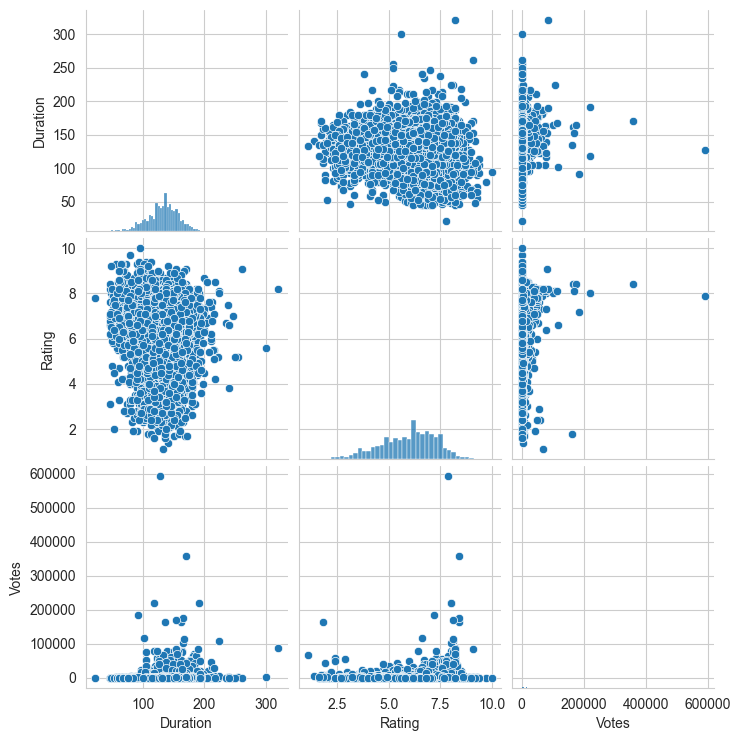

In [44]:
import seaborn as sns
sns.pairplot(dur_rat)
plt.show()